# Scatter matrix

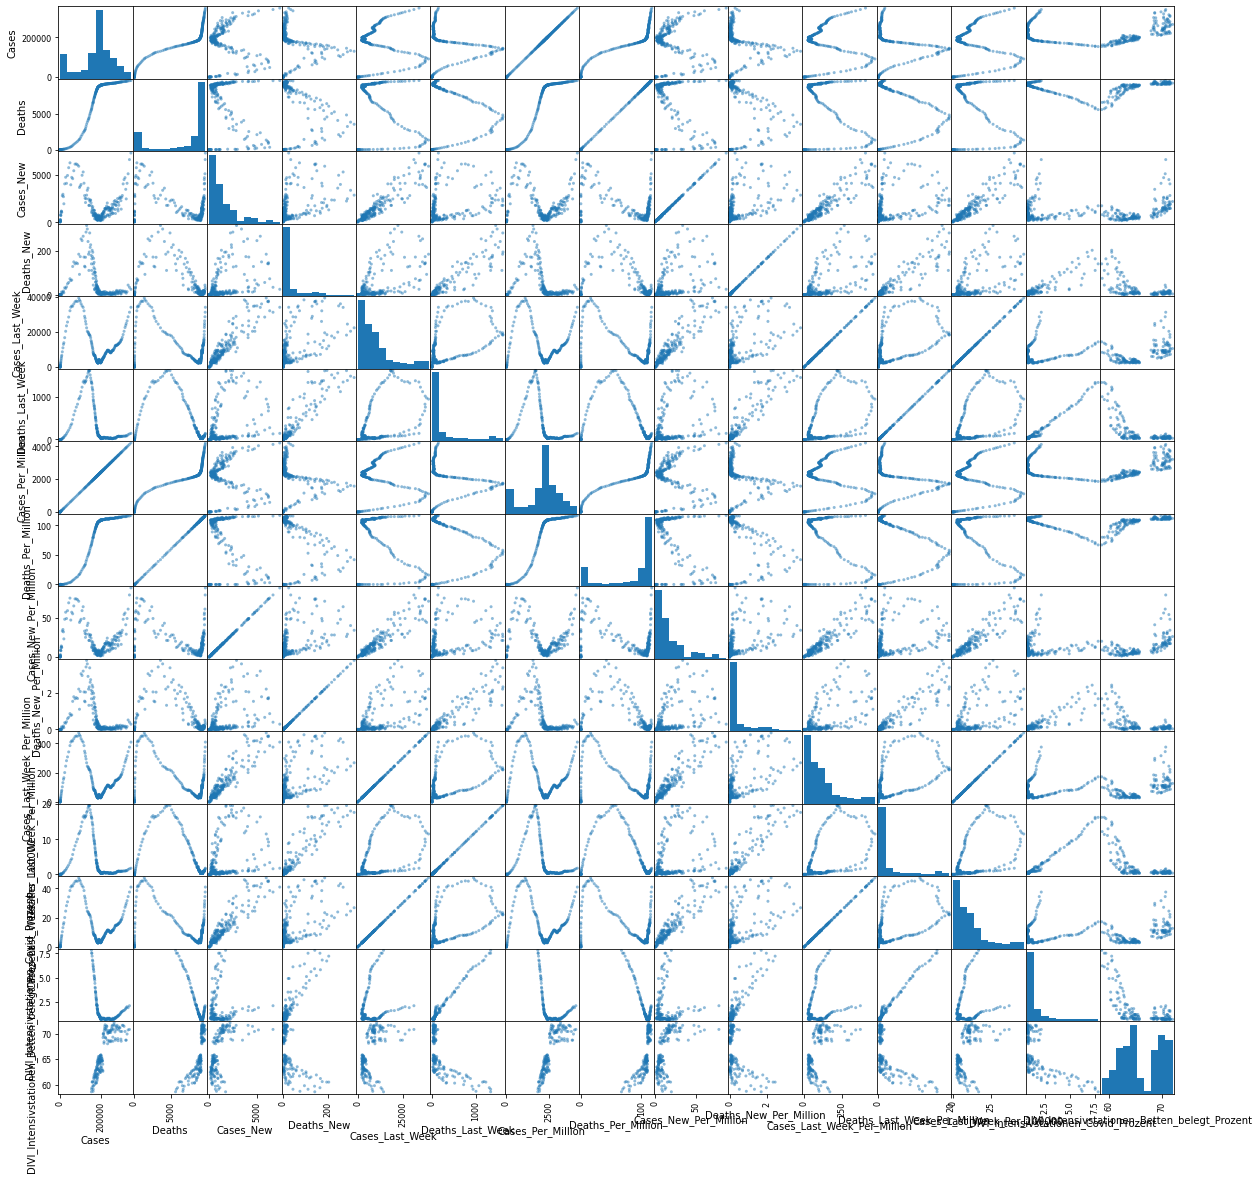

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scrape import entorb

area = 'DE-total'
de = entorb.to_dataframe(area)
de.drop(columns=[c for c in de.columns if "Doubling_Time" in c], inplace=True)
pd.plotting.scatter_matrix(de, figsize=(20,20))
plt.show()

# R²

In [2]:
corr = de.corr()**2
corr.style.background_gradient(cmap='Blues')

,Cases,Deaths,Cases_New,Deaths_New,Cases_Last_Week,Deaths_Last_Week,Cases_Per_Million,Deaths_Per_Million,Cases_New_Per_Million,Deaths_New_Per_Million,Cases_Last_Week_Per_Million,Deaths_Last_Week_Per_Million,Cases_Last_Week_Per_100000,DIVI_Intensivstationen_Covid_Prozent,DIVI_Intensivstationen_Betten_belegt_Prozent
Cases,1.000000,0.851386,0.000851,0.061334,0.001179,0.049373,1.000000,0.850581,0.000843,0.061342,0.001186,0.049351,0.001186,0.227680,0.697040
Deaths,0.851386,1.000000,0.116553,0.130077,0.125112,0.097509,0.851372,0.999950,0.116240,0.130094,0.125224,0.097481,0.125224,0.900302,0.581036
Cases_New,0.000851,0.116553,1.000000,0.193222,0.857906,0.100501,0.000849,0.117687,0.999755,0.193211,0.858030,0.100505,0.858030,0.000011,0.339830
Deaths_New,0.061334,0.130077,0.193222,1.000000,0.329298,0.853915,0.061325,0.130951,0.193506,1.000000,0.329043,0.853928,0.329043,0.812824,0.267285
Cases_Last_Week,0.001179,0.125112,0.857906,0.329298,1.000000,0.245962,0.001177,0.126390,0.858805,0.329295,0.999993,0.245952,0.999993,0.016634,0.259773
Deaths_Last_Week,0.049373,0.097509,0.100501,0.853915,0.245962,1.000000,0.049363,0.098097,0.101130,0.853902,0.245712,1.000000,0.245712,0.984282,0.408158
Cases_Per_Million,1.000000,0.851372,0.000849,0.061325,0.001177,0.049363,1.000000,0.850567,0.000840,0.061333,0.001184,0.049340,0.001184,0.227635,0.697023
Deaths_Per_Million,0.850581,0.999950,0.117687,0.130951,0.126390,0.098097,0.850567,1.000000,0.117373,0.130968,0.126503,0.098069,0.126503,0.901001,0.579299
Cases_New_Per_Million,0.000843,0.116240,0.999755,0.193506,0.858805,0.101130,0.000840,0.117373,1.000000,0.193495,0.858927,0.101134,0.858927,0.000021,0.339331
Deaths_New_Per_Million,0.061342,0.130094,0.193211,1.000000,0.329295,0.853902,0.061333,0.130968,0.193495,1.000000,0.329039,0.853916,0.329039,0.812773,0.267224


# Deaths formula:

Deaths(Cases) = 
               4                 3                2
8.634e-18 Cases - 6.939e-12 Cases + 1.71e-06 Cases - 0.09163 Cases + 449.5


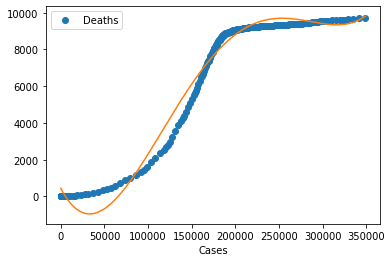

In [3]:
import numpy as np
coefs = np.polyfit(x=de['Cases'], y=de['Deaths'], deg=4)
de.plot(kind='line', x='Cases', y='Deaths', linestyle='', marker='o')
poly = np.poly1d(coefs, variable='Cases')
plt.plot(de['Cases'], poly(de['Cases']))
print("Deaths(Cases) = ")
print(poly)

-13.183483920846724

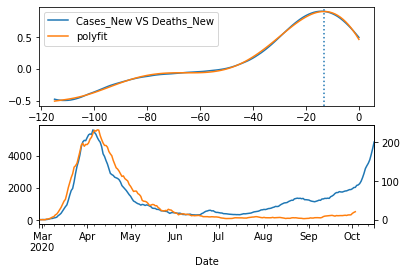

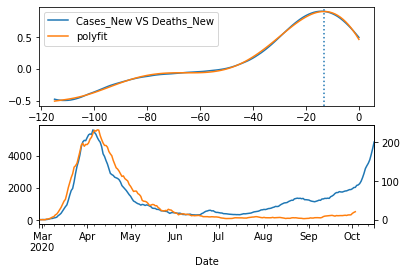

In [4]:
overlapping_days = int(0.5 * min([len(de['Cases_New']), len(de['Deaths_New'])]))

lcor = lagged_correlation = pd.DataFrame.from_dict(
    {'Cases_New VS Deaths_New': [de['Cases_New'].rolling('7D').mean().corr(de['Deaths_New'].rolling('7D').mean().shift(-t)) for t in range(overlapping_days)],
     'Delta_New': [-t for t in range(overlapping_days)]}).set_index('Delta_New')

fig, axes = plt.subplots(nrows=2)

poly = np.poly1d(np.polyfit(x=lcor.index, y=lcor['Cases_New VS Deaths_New'], deg=7), variable='r')
lag = [x.real for x in poly.deriv().r if x.imag==0 and x.real<0][-1]
display(lag)

lcor.plot(ax=axes[0])
axes[0].plot(lcor.index, poly(lcor.index), label="polyfit")
axes[0].axvline(lag, linestyle=':')
axes[0].legend()

de['Cases_New'].rolling('7D').mean().plot(ax=axes[1])
de['Deaths_New'].rolling('7D').mean().shift(int(lag)).plot(ax=axes[1], secondary_y=True)
display(fig)